In [1]:
# Necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify where to save the processed files as sa vepath
#path = 'H:/Downloads/PhD-Atif/Warren_2019-master'
path = '/Users/frestie/Desktop/DissertationProject/data.txt'

## 2 Loading the raw data

In [3]:
df = pd.read_csv('dat.txt', sep='\t', header=0)

In [4]:
df

,value,id,channel,patient_type,patient_id,replicate,subject_group,patrep_id,cell_id,colour,type
0,3.403409,1,SDHA,control,C02,1,Control,C02R01,C02R01_0001,#0000FF0A,mean intensity
1,3.664688,2,SDHA,control,C02,1,Control,C02R01,C02R01_0002,#0000FF0A,mean intensity
2,6.227979,3,SDHA,control,C02,1,Control,C02R01,C02R01_0003,#0000FF0A,mean intensity
3,3.478873,4,SDHA,control,C02,1,Control,C02R01,C02R01_0004,#0000FF0A,mean intensity
4,4.957944,5,SDHA,control,C02,1,Control,C02R01,C02R01_0005,#0000FF0A,mean intensity
...,...,...,...,...,...,...,...,...,...,...,...
269815,186.000000,751,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0751,#FF00000A,mean intensity
269816,141.000000,752,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0752,#FF00000A,mean intensity
269817,120.000000,753,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0753,#FF00000A,mean intensity
269818,99.000000,754,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0754,#FF00000A,mean intensity


### Exploring the categorical columns

In [5]:
df_categorical = df[['channel','patient_type','patient_id','replicate','subject_group','patrep_id','colour','type']]


In [6]:
for col in df_categorical:
    print(df_categorical[col].unique())

['SDHA' 'LOG_SDHA' 'MED_SDHA' 'NDUFB8' 'LOG_NDUFB8' 'MED_NDUFB8' 'OSCP'
 'LOG_OSCP' 'MED_OSCP' 'GRIM19' 'LOG_GRIM19' 'MED_GRIM19' 'VDAC1'
 'LOG_VDAC1' 'MED_VDAC1' 'COX4+4L2' 'LOG_COX4+4L2' 'MED_COX4+4L2' 'MTCO1'
 'LOG_MTCO1' 'MED_MTCO1' 'UqCRC2' 'LOG_UqCRC2' 'MED_UqCRC2' 'Area'
 'AspectRatio' 'Perimeter' 'Circularity' 'xCoord' 'yCoord']
['control' 'patient']
['C02' 'C01' 'C03' 'P10' 'P04' 'P02' 'P05' 'P01' 'P08' 'P06' 'P03' 'P09'
 'P07']
[1]
['Control' 'MT-TW' 'Deletion' 'CI' 'MT-TL1' 'MT-TG' 'MT-TE']
['C02R01' 'C01R01' 'C03R01' 'P10R01' 'P04R01' 'P02R01' 'P05R01' 'P01R01'
 'P08R01' 'P06R01' 'P03R01' 'P09R01' 'P07R01']
['#0000FF0A' '#FF00000A']
['mean intensity' 'log mean intensity' 'median intensity' 'area'
 'aspect ratio' 'perimeter' 'circularity']


In [7]:
df['channel'] = df['channel'].str.replace('GRIM19','NDUFA13')

In [8]:
df.channel.unique()

array(['SDHA', 'LOG_SDHA', 'MED_SDHA', 'NDUFB8', 'LOG_NDUFB8',
       'MED_NDUFB8', 'OSCP', 'LOG_OSCP', 'MED_OSCP', 'NDUFA13',
       'LOG_NDUFA13', 'MED_NDUFA13', 'VDAC1', 'LOG_VDAC1', 'MED_VDAC1',
       'COX4+4L2', 'LOG_COX4+4L2', 'MED_COX4+4L2', 'MTCO1', 'LOG_MTCO1',
       'MED_MTCO1', 'UqCRC2', 'LOG_UqCRC2', 'MED_UqCRC2', 'Area',
       'AspectRatio', 'Perimeter', 'Circularity', 'xCoord', 'yCoord'],
      dtype=object)

In [9]:
df.groupby('patient_id').cell_id.nunique()

patient_id
C01     148
C02     289
C03     131
P01     337
P02     232
P03    1361
P04     879
P05    1878
P06     808
P07     755
P08     628
P09     946
P10     602
Name: cell_id, dtype: int64

## 3 Reshaping the dataframe 

In [10]:
#df1=df.pivot(index=['cell_id','subject_group'], columns = ['channel'],values =['value'])

df1= pd.pivot_table(df, index=['cell_id','patient_type','subject_group','patient_id','colour'], columns = ['channel'],values =['value'])

In [11]:
pd.set_option('display.max_columns', None)
df1

value  \
channel                                                        Area   
cell_id     patient_type subject_group patient_id colour              
C01R01_0001 control      Control       C01        #0000FF0A   879.0   
C01R01_0002 control      Control       C01        #0000FF0A  2556.0   
C01R01_0003 control      Control       C01        #0000FF0A  6432.0   
C01R01_0004 control      Control       C01        #0000FF0A  3072.0   
C01R01_0005 control      Control       C01        #0000FF0A  8734.5   
...                                                             ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A  1858.0   
P10R01_0599 patient      MT-TW         P10        #FF00000A  3970.5   
P10R01_0600 patient      MT-TW         P10        #FF00000A  1458.0   
P10R01_0601 patient      MT-TW         P10        #FF00000A  1276.5   
P10R01_0602 patient      MT-TW         P10        #FF00000A  1339.5   

                                                                         \
channel                                                     AspectRatio   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.448980   
C01R01_0002 control      Control       C01        #0000FF0A    0.876923   
C01R01_0003 control      Control       C01        #0000FF0A    0.800000   
C01R01_0004 control      Control       C01        #0000FF0A    1.157143   
C01R01_0005 control      Control       C01        #0000FF0A    1.595238   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    2.000000   
P10R01_0599 patient      MT-TW         P10        #FF00000A    1.451613   
P10R01_0600 patient      MT-TW         P10        #FF00000A    2.900000   
P10R01_0601 patient      MT-TW         P10        #FF00000A    3.133333   
P10R01_0602 patient      MT-TW         P10        #FF00000A    1.555556   

                                                                        \
channel                                                       COX4+4L2   
cell_id     patient_type subject_group patient_id colour                 
C01R01_0001 control      Control       C01        #0000FF0A   4.926230   
C01R01_0002 control      Control       C01        #0000FF0A   9.064356   
C01R01_0003 control      Control       C01        #0000FF0A   7.408696   
C01R01_0004 control      Control       C01        #0000FF0A   8.756881   
C01R01_0005 control      Control       C01        #0000FF0A   5.994460   
...                                                                ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A   8.157025   
P10R01_0599 patient      MT-TW         P10        #FF00000A   8.354244   
P10R01_0600 patient      MT-TW         P10        #FF00000A  13.741228   
P10R01_0601 patient      MT-TW         P10        #FF00000A  15.060748   
P10R01_0602 patient      MT-TW         P10        #FF00000A   7.575000   

                                                                         \
channel                                                     Circularity   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.667624   
C01R01_0002 control      Control       C01        #0000FF0A    0.662271   
C01R01_0003 control      Control       C01        #0000FF0A    0.484423   
C01R01_0004 control      Control       C01        #0000FF0A    0.608063   
C01R01_0005 control      Control       C01        #0000FF0A    0.705084   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    0.240837   
P10R01_0599 patient      MT-TW         P10        #FF00000A    0.409971   
P10R01_0600 patient      MT-TW         P10        #FF00000A    0.198452   
P10R01_0601 patient      MT-TW         P10        #FF00000A    0.228461   
P10R

In [12]:
df2= df1.reset_index()

In [13]:
df2

cell_id patient_type subject_group patient_id     colour   value  \
channel                                                                  Area   
0        C01R01_0001      control       Control        C01  #0000FF0A   879.0   
1        C01R01_0002      control       Control        C01  #0000FF0A  2556.0   
2        C01R01_0003      control       Control        C01  #0000FF0A  6432.0   
3        C01R01_0004      control       Control        C01  #0000FF0A  3072.0   
4        C01R01_0005      control       Control        C01  #0000FF0A  8734.5   
...              ...          ...           ...        ...        ...     ...   
8989     P10R01_0598      patient         MT-TW        P10  #FF00000A  1858.0   
8990     P10R01_0599      patient         MT-TW        P10  #FF00000A  3970.5   
8991     P10R01_0600      patient         MT-TW        P10  #FF00000A  1458.0   
8992     P10R01_0601      patient         MT-TW        P10  #FF00000A  1276.5   
8993     P10R01_0602      patient         MT-TW        P10  #FF00000A  1339.5   

                                                                               \
channel AspectRatio   COX4+4L2 Circularity LOG_COX4+4L2 LOG_MTCO1 LOG_NDUFA13   
0          0.448980   4.926230    0.667624     3.528312  1.512562    1.718303   
1          0.876923   9.064356    0.662271     6.656274  1.763175    2.777602   
2          0.800000   7.408696    0.484423     5.569829  1.652074    2.207175   
3          1.157143   8.756881    0.608063     7.275473  1.843152    2.923391   
4          1.595238   5.994460    0.705084     4.253457  1.421162    1.760127   
...             ...        ...         ...          ...       ...         ...   
8989       2.000000   8.157025    0.240837     6.455170  1.407893    1.904649   
8990       1.451613   8.354244    0.409971     7.325609  1.150830    1.477179   
8991       2.900000  13.741228    0.198452    11.432586  1.307792    1.628173   
8992       3.133333  15.060748    0.228461    13.320255  1.817468    3.064791   
8993       1.555556   7.575000    0.240358     6.022850  1.099101    1.324772   

                                                                            \
channel LOG_NDUFB8   LOG_OSCP   LOG_SDHA LOG_UqCRC2 LOG_VDAC1 MED_COX4+4L2   
0         1.926028   2.092291   2.498110   2.793981  1.574617          4.0   
1         2.671580   2.926415   4.195481   4.720006  1.753394          7.0   
2         2.160935   2.409333   3.632043   3.797937  1.552955          6.0   
3         2.566386   2.976915   4.496332   4.825183  1.750554          8.0   
4         1.769816   2.003908   2.789748   2.704791  1.469509          4.0   
...            ...        ...        ...        ...       ...          ...   
8989      1.519806  10.240695  13.661039  10.582099  2.976675          7.0   
8990      1.191700  21.188446  44.385100  14.004130  5.544963          8.0   
8991      1.312752  40.187626  63.152782  28.195734  9.497522         12.0   
8992      2.606018   4.084147   5.848844   8.787500  2.405839         14.0   
8993      1.206204  14.693705  33.566143   9.559546  4.394516          6.0   

                                                                       \
channel MED_MTCO1 MED_NDUFA13 MED_NDUFB8 MED_OSCP MED_SDHA MED_UqCRC2   
0             1.0         2.0        2.0      2.0      2.0        3.0   
1             2.0         3.0        3.0      3.0      4.0        5.0   
2             2.0         2.0        2.0      2.0      4.0        4.0   
3             2.0         3.0        3.0      3.0      5.0        5.0   
4             1.0         2.0        2.0      2.0      3.0        3.0   
...           ...         ...        ...      ...      ...        ...   
8989          1.0         2.0        1.0     11.0     15.0       10.0   
8990          1.0         1.0        1.0     23.0     47.0       15.0   
8991          1.0         1.0        1.0     41.0     62.0       30.0   
8992          2.0         3.0        3.0      4.0      6.0        9.0   
8993          

In [14]:
df2= df2.rename(columns={"value":""})

In [15]:
list(df2.columns)

[('cell_id', ''),
 ('patient_type', ''),
 ('subject_group', ''),
 ('patient_id', ''),
 ('colour', ''),
 ('', 'Area'),
 ('', 'AspectRatio'),
 ('', 'COX4+4L2'),
 ('', 'Circularity'),
 ('', 'LOG_COX4+4L2'),
 ('', 'LOG_MTCO1'),
 ('', 'LOG_NDUFA13'),
 ('', 'LOG_NDUFB8'),
 ('', 'LOG_OSCP'),
 ('', 'LOG_SDHA'),
 ('', 'LOG_UqCRC2'),
 ('', 'LOG_VDAC1'),
 ('', 'MED_COX4+4L2'),
 ('', 'MED_MTCO1'),
 ('', 'MED_NDUFA13'),
 ('', 'MED_NDUFB8'),
 ('', 'MED_OSCP'),
 ('', 'MED_SDHA'),
 ('', 'MED_UqCRC2'),
 ('', 'MED_VDAC1'),
 ('', 'MTCO1'),
 ('', 'NDUFA13'),
 ('', 'NDUFB8'),
 ('', 'OSCP'),
 ('', 'Perimeter'),
 ('', 'SDHA'),
 ('', 'UqCRC2'),
 ('', 'VDAC1'),
 ('', 'xCoord'),
 ('', 'yCoord')]

In [16]:
df2.columns = [f'{i}{j}' for i, j in df2.columns]
df2.columns = df2.columns.map(''.join)
#df2.columns = df2.columns.map('{0[0]}{0[1]}'.format) 

In [17]:
df2

,cell_id,patient_type,subject_group,patient_id,colour,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord
0,C01R01_0001,control,Control,C01,#0000FF0A,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0
1,C01R01_0002,control,Control,C01,#0000FF0A,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0
2,C01R01_0003,control,Control,C01,#0000FF0A,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0
3,C01R01_0004,control,Control,C01,#0000FF0A,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0
4,C01R01_0005,control,Control,C01,#0000FF0A,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,P10R01_0598,patient,MT-TW,P10,#FF00000A,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0
8990,P10R01_0599,patient,MT-TW,P10,#FF00000A,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0
8991,P10R01_0600,patient,MT-TW,P10,#FF00000A,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312752,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0
8992,P10R01_0601,patient,MT-TW,P10,#FF00000A,1276.5,3.133333,15.060748,0.228461,13.320255,1.817468,3.064791,2.606018,4.084147,5.848844,8.787500,2.405839,14.0,2.0,3.0,3.0,4.0,6.0,9.0,2.0,2.135514,3.644860,3.056075,5.051402,264.977702,7.032710,10.261682,2.957944,1079.0,58.0


## 4 Including necessary Columns

In [19]:
df = df2[['cell_id', 'patient_type', 'patient_id', 'subject_group', 'LOG_NDUFA13','LOG_NDUFB8','LOG_MTCO1', 'LOG_COX4+4L2', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]
print (df)

          cell_id patient_type patient_id subject_group  LOG_NDUFA13  \
0     C01R01_0001      control        C01       Control     1.718303   
1     C01R01_0002      control        C01       Control     2.777602   
2     C01R01_0003      control        C01       Control     2.207175   
3     C01R01_0004      control        C01       Control     2.923391   
4     C01R01_0005      control        C01       Control     1.760127   
...           ...          ...        ...           ...          ...   
8989  P10R01_0598      patient        P10         MT-TW     1.904649   
8990  P10R01_0599      patient        P10         MT-TW     1.477179   
8991  P10R01_0600      patient        P10         MT-TW     1.628173   
8992  P10R01_0601      patient        P10         MT-TW     3.064791   
8993  P10R01_0602      patient        P10         MT-TW     1.324772   

      LOG_NDUFB8  LOG_MTCO1  LOG_COX4+4L2   LOG_OSCP   LOG_SDHA  LOG_UqCRC2  \
0       1.926028   1.512562      3.528312   2.092291   2

## 5 Exploratory Data Analysis 

In [20]:
df_eda = df

<AxesSubplot:>

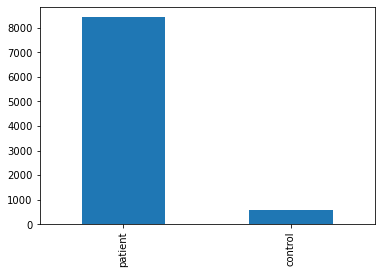

In [21]:
df_eda.patient_type.value_counts().plot(kind='bar')

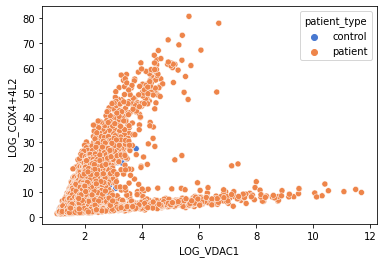

In [22]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_COX4+4L2", hue="patient_type", palette='muted',data=df_eda)

In [23]:
import matplotlib.pyplot as plt

grouped = df.groupby("patient_type")

grouped = df.groupby("LOG_COX4+4L2")

grouped = df.groupby(["patient_type", "LOG_COX4+4L2"])

print(grouped)

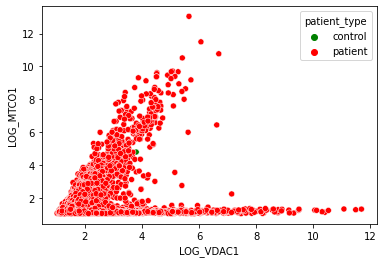

In [24]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_MTCO1", hue="patient_type", palette=['green','red'], data=df_eda)

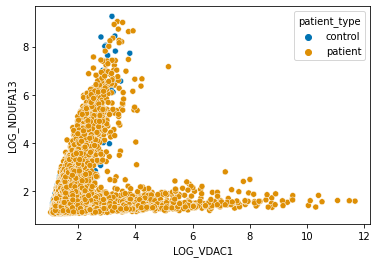

In [25]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFA13", hue="patient_type",palette='colorblind', data=df_eda)

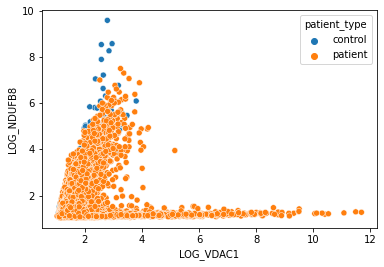

In [26]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFB8", hue="patient_type", data=df_eda)

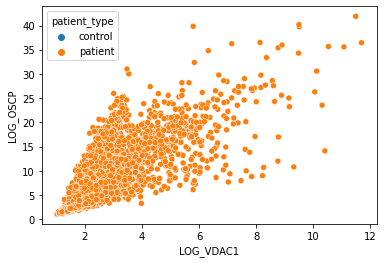

In [27]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_OSCP", hue="patient_type", data=df_eda)

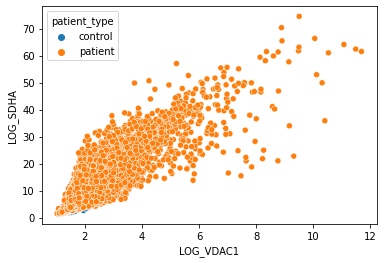

In [28]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_SDHA", hue="patient_type", data=df_eda)

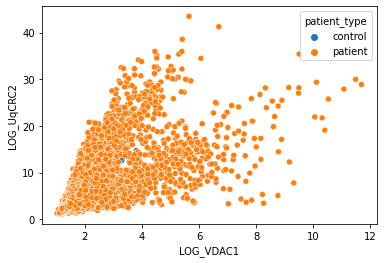

In [29]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_UqCRC2", hue="patient_type", data=df_eda)

# Fibre Classification Using Clustering Algorithms

## 6a K-means Clustering

In [66]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from time import time
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df3 = df
df3 == df3

X = df3[['LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1' ]]
labels = df3[['cell_id']]

labels.cell_id = labels.cell_id.astype("category")
labels.cell_id = labels.cell_id.cat.codes
labels.cell_id = labels.cell_id.astype("int")

cls = KMeans(n_clusters = 2)
lab = cls.fit(X)
lab.labels_

/Users/frestie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [67]:
#K-means predicting who are patients an who are control
df3['patient_id'] = lab.labels_
print(df3['patient_id'])

0       0
1       0
2       0
3       0
4       0
       ..
8989    0
8990    1
8991    1
8992    0
8993    1
Name: patient_id, Length: 8994, dtype: int32


<ipython-input-67-3dcb69ea79fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['patient_id'] = lab.labels_


## 7a Visualise Results

<AxesSubplot:xlabel='LOG_VDAC1', ylabel='LOG_NDUFA13'>

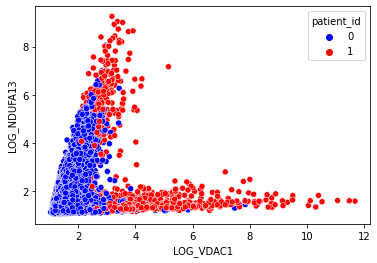

In [68]:
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=X.LOG_VDAC1, y=X.LOG_NDUFA13, data=df3, hue="patient_id", palette = dic)

<AxesSubplot:xlabel='LOG_VDAC1', ylabel='LOG_NDUFB8'>

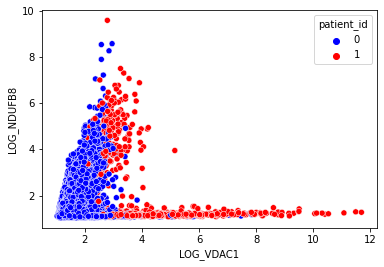

In [69]:
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=X.LOG_VDAC1, y=X.LOG_NDUFB8, data=df3, hue="patient_id", palette = dic)

## 8a Number of each individual's fibres are in each group

In [70]:
df = df2[['cell_id', 'patient_type', 'patient_id', 'subject_group', 'LOG_NDUFA13','LOG_NDUFB8','LOG_MTCO1', 'LOG_COX4+4L2', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]

print ("For Control 1:")
C1 = df['patient_id'].str.contains('C01', regex=False, case=False, na=False).value_counts()
print(C1)
(df3['patient_id'][:148])


## next check how many 0 and 1 in rows 1:148
control1a = (df3['patient_id'][:148] == 0).sum(axis = 0)
print('healthy = ', control1a)
control1b = (df3['patient_id'][:148] == 1).sum(axis = 0)
print('disease = ', control1b)

For Control 1:
False    8846
True      148
Name: patient_id, dtype: int64
healthy =  148
disease =  0


In [71]:
print ("For Control 2:")
C2 = df['patient_id'].str.contains('C02', regex=False, case=False, na=False).value_counts()
print(C2)
(df3['patient_id'][148:437])


## next check how many 0 and 1 in rows 148:437
control2a = (df3['patient_id'][148:437] == 0).sum(axis = 0)
print('healthy = ', control2a)
control2b = (df3['patient_id'][148:437] == 1).sum(axis = 0)
print('disease = ', control2b)

For Control 2:
False    8705
True      289
Name: patient_id, dtype: int64
healthy =  289
disease =  0


In [72]:
print ("For Control 3:")
C3 = df['patient_id'].str.contains('C03', regex=False, case=False, na=False).value_counts()
print(C3)
(df3['patient_id'][437:568])


## next check how many 0 and 1 in rows 437:568
control3a = (df3['patient_id'][437:568] == 0).sum(axis = 0)
print('healthy = ', control3a)
control3b = (df3['patient_id'][437:568] == 1).sum(axis = 0)
print('disease = ', control3b)

For Control 3:
False    8863
True      131
Name: patient_id, dtype: int64
healthy =  102
disease =  29


In [73]:
print ("For Patient 1:")
P1 = df['patient_id'].str.contains('P01', regex=False, case=False, na=False).value_counts()
print(P1)
(df3['patient_id'][568:905])


## next check how many 0 and 1 in rows 568:905
patient1 = (df3['patient_id'][568:905] == 0).sum(axis = 0)
print('healthy = ', patient1)
patient1b = (df3['patient_id'][568:905] == 1).sum(axis = 0)
print('disease = ', patient1b)

For Patient 1:
False    8657
True      337
Name: patient_id, dtype: int64
healthy =  69
disease =  268


In [74]:
print ("For Patient 2:")
P2 = df['patient_id'].str.contains('P02', regex=False, case=False, na=False).value_counts()
print(P2)
(df3['patient_id'][905:1137])


## next check how many 0 and 1 in rows 905:1137
patient2 = (df3['patient_id'][905:1137] == 0).sum(axis = 0)
print('healthy = ', patient2)
patient2b = (df3['patient_id'][905:1137] == 1).sum(axis = 0)
print('disease = ', patient2b)

For Patient 2:
False    8762
True      232
Name: patient_id, dtype: int64
healthy =  24
disease =  208


In [75]:
print ("For Patient 3:")
P3 = df['patient_id'].str.contains('P03', regex=False, case=False, na=False).value_counts()
print(P3)
(df3['patient_id'][1137:2498])


## next check how many 0 and 1 in rows 1137:2498
patient3 = (df3['patient_id'][1137:2498] == 0).sum(axis = 0)
print('healthy = ', patient3)
patient3b = (df3['patient_id'][1137:2498] == 1).sum(axis = 0)
print('disease = ', patient3b)

For Patient 3:
False    7633
True     1361
Name: patient_id, dtype: int64
healthy =  1361
disease =  0


In [76]:
print ("For Patient 4:")
P4 = df['patient_id'].str.contains('P04', regex=False, case=False, na=False).value_counts()
print(P4)
(df3['patient_id'][2498:3377])


## next check how many 0 and 1 in rows 2498:3377
patient4 = (df3['patient_id'][2498:3377] == 0).sum(axis = 0)
print('healthy = ', patient4)
patient4b = (df3['patient_id'][2498:3377] == 1).sum(axis = 0)
print('disease = ', patient4b)

For Patient 4:
False    8115
True      879
Name: patient_id, dtype: int64
healthy =  733
disease =  146


In [77]:
print ("For Patient 5:")
P5 = df['patient_id'].str.contains('P05', regex=False, case=False, na=False).value_counts()
print(P5)
(df3['patient_id'][3377:5255])


## next check how many 0 and 1 in rows 3377:5255
patient5 = (df3['patient_id'][3377:5255] == 0).sum(axis = 0)
print('healthy = ', patient5)
patient5b = (df3['patient_id'][3377:5255] == 1).sum(axis = 0)
print('disease = ', patient5b)

For Patient 5:
False    7116
True     1878
Name: patient_id, dtype: int64
healthy =  1866
disease =  12


In [78]:
print ("For Patient 6:")
P6 = df['patient_id'].str.contains('P06', regex=False, case=False, na=False).value_counts()
print(P6)
(df3['patient_id'][5255:6063])


## next check how many 0 and 1 in rows 5255:6063
patient6 = (df3['patient_id'][5255:6063] == 0).sum(axis = 0)
print('healthy = ', patient6)
patient6b = (df3['patient_id'][5255:6063] == 1).sum(axis = 0)
print('disease = ', patient6b)

For Patient 6:
False    8186
True      808
Name: patient_id, dtype: int64
healthy =  538
disease =  270


In [81]:
print ("For Patient 7:")
P7 = df['patient_id'].str.contains('P07', regex=False, case=False, na=False).value_counts()
print(P7)
(df3['patient_id'][6063:6818])


## next check how many 0 and 1 in rows 6063:6818
patient7 = (df3['patient_id'][6063:6818] == 0).sum(axis = 0)
print('healthy = ', patient7)
patient7b = (df3['patient_id'][6063:6818] == 1).sum(axis = 0)
print('disease = ', patient7b)

For Patient 7:
False    8239
True      755
Name: patient_id, dtype: int64
healthy =  581
disease =  174


In [82]:
print ("For Patient 8:")
P8 = df['patient_id'].str.contains('P08', regex=False, case=False, na=False).value_counts()
print(P8)
(df3['patient_id'][6818:7446])


## next check how many 0 and 1 in rows 6818:7446
patient8 = (df3['patient_id'][6818:7446] == 0).sum(axis = 0)
print('healthy = ', patient8)
patient8b = (df3['patient_id'][6818:7446] == 1).sum(axis = 0)
print('disease = ', patient8b)

For Patient 8:
False    8366
True      628
Name: patient_id, dtype: int64
healthy =  531
disease =  97


In [83]:
print ("For Patient 9:")
P9 = df['patient_id'].str.contains('P09', regex=False, case=False, na=False).value_counts()
print(P9)
(df3['patient_id'][7446:8392])


## next check how many 0 and 1 in rows 7446:8392
patient9 = (df3['patient_id'][7446:8392] == 0).sum(axis = 0)
print('healthy = ', patient9)
patient9b = (df3['patient_id'][7446:8392] == 1).sum(axis = 0)
print('disease = ', patient9b)

For Patient 9:
False    8048
True      946
Name: patient_id, dtype: int64
healthy =  892
disease =  54


In [84]:
print ("For Patient 10:")
P10 = df['patient_id'].str.contains('P10', regex=False, case=False, na=False).value_counts()
print(P10)
(df3['patient_id'][8392:8994])


## next check how many 0 and 1 in rows 8392:8994
patient10 = (df3['patient_id'][8392:8994] == 0).sum(axis = 0)
print('healthy = ', patient10)
patient10b = (df3['patient_id'][8392:8994] == 1).sum(axis = 0)
print('disease = ', patient10b)

For Patient 10:
False    8392
True      602
Name: patient_id, dtype: int64
healthy =  225
disease =  377


## 9a Number of each Subject Type with fibres in each group

In [85]:
print ("For Control:")
TotalControl = df['subject_group'].str.contains('Control', regex=False, case=False, na=False).value_counts()
print(TotalControl)
(df3['subject_group'][:568])


## next check how many 0 and 1 in rows 1-568
Contr = (df3['patient_id'][:568] == 0).sum(axis = 0)
print('Total number of healthy fibres = ',Contr)
Contr2 = (df3['patient_id'][:568] == 1).sum(axis = 0)
print('Total number of disease fibres = ',Contr2)

For Control:
False    8426
True      568
Name: subject_group, dtype: int64
Total number of healthy fibres =  539
Total number of disease fibres =  29


In [86]:
print ("For CI: ") ## patients 1 and 2
TotalCI= df['subject_group'].str.contains('CI', regex=False, case=False, na=False).value_counts()
print(TotalCI)
(df3['subject_group'][568:1137])


## next check how many 0 and 1 in CI
CI = (df3['patient_id'][568:1137] == 0).sum(axis = 0)
print('Total number of healthy fibres = ',CI)
CI2 = (df3['patient_id'][568:1137] == 1).sum(axis = 0)
print('Total number of disease fibres = ',CI2)

For CI: 
False    8425
True      569
Name: subject_group, dtype: int64
Total number of healthy fibres =  93
Total number of disease fibres =  476


In [87]:
print ("For Deletion: ") ## patients 3 and 4
Totaldel= df['subject_group'].str.contains('Deletion', regex=False, case=False, na=False).value_counts()
print(Totaldel)
(df3['subject_group'][1137:3377])


## next check how many 0 and 1 in CI
Del = (df3['patient_id'][1137:3377] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', Del)
Del2 = (df3['patient_id'][1137:3377] == 1).sum(axis = 0)
print('Total number of disease fibres = ', Del2)

For Deletion: 
False    6754
True     2240
Name: subject_group, dtype: int64
Total number of healthy fibres =  2094
Total number of disease fibres =  146


In [88]:
print ("For MT-TL1: ") ## patients 5, 6 and 7
Totalmttl1= df['subject_group'].str.contains('MT-TL1', regex=False, case=False, na=False).value_counts()
print(Totalmttl1)
(df3['subject_group'][3377:6818])


## next check how many 0 and 1 in CI
MTTL1 = (df3['patient_id'][3377:6818] == 0).sum(axis = 0)
print('Total number of healthy fibres = ',MTTL1)
MTTL1b = (df3['patient_id'][3377:6818] == 1).sum(axis = 0)
print('Total number of disease fibres = ',MTTL1b)

For MT-TL1: 
False    5553
True     3441
Name: subject_group, dtype: int64
Total number of healthy fibres =  2985
Total number of disease fibres =  456


In [89]:
print ("For MT-TG: ")  ## same as result of pt 8 as only sample with this disease
Totalmttg= df['subject_group'].str.contains('MT-TG', regex=False, case=False, na=False).value_counts()
print(Totalmttg)
(df3['subject_group'][6818:7446])


## next check how many 0 and 1 in CI
MTTG = (df3['patient_id'][6818:7446] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', MTTG)
MTTGb = (df3['patient_id'][6818:7446] == 1).sum(axis = 0)
print('Total number of disease fibres = ', MTTGb)
##so 564 are coming as control and 64 as patient fibres.

For MT-TG: 
False    8366
True      628
Name: subject_group, dtype: int64
Total number of healthy fibres =  531
Total number of disease fibres =  97


In [90]:
print ("For MT-TE: ") ## same as result of pt 9 as only sample with this disease
TotalCI= df['subject_group'].str.contains('MT-TE', regex=False, case=False, na=False).value_counts()
print(TotalCI)
(df3['subject_group'][7446:8392])


## next check how many 0 and 1 in CI
MTTE = (df3['patient_id'][7446:8392] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', MTTE)
MTTEb = (df3['patient_id'][7446:8392] == 1).sum(axis = 0)
print('Total number of disease fibres = ', MTTEb)

For MT-TE: 
False    8048
True      946
Name: subject_group, dtype: int64
Total number of healthy fibres =  892
Total number of disease fibres =  54


In [91]:
print ("For MT-TW: ") ## same as result of pt 10 as only sample with this disease
Totalmttw= df['subject_group'].str.contains('MT-TW', regex=False, case=False, na=False).value_counts()
print(Totalmttw)
(df3['subject_group'][8392:8994])


## next check how many 0 and 1 in CI
MTTW = (df3['patient_id'][8392:8994] == 0).sum(axis = 0)
print('Total number of healthy fibres = ', MTTW)
MTTWb = (df3['patient_id'][8392:8994] == 1).sum(axis = 0)
print('Total number of disease fibres = ', MTTWb)

For MT-TW: 
False    8392
True      602
Name: subject_group, dtype: int64
Total number of healthy fibres =  225
Total number of disease fibres =  377


## 6b GMM

In [92]:
from sklearn.mixture import GaussianMixture as GMM

df4 = df
df4 == df4

Xx = df4[['LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1' ]]
labels = df4[['cell_id']]

labels.cell_id = labels.cell_id.astype("category")
labels.cell_id = labels.cell_id.cat.codes
labels.cell_id = labels.cell_id.astype("int")

clsgmm = GMM(n_components = 2)
clsgmm.fit(Xx)

/Users/frestie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


GaussianMixture(n_components=2)

In [93]:
predictLabels = cls.fit_predict(Xx,Xx)

print(classification_report(labels.cell_id,predictLabels))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

/Users/frestie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/frestie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/frestie/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
df5 = df[['LOG_NDUFA13', 'LOG_VDAC1']]
print(df5)

      LOG_NDUFA13  LOG_VDAC1
0        1.718303   1.574617
1        2.777602   1.753394
2        2.207175   1.552955
3        2.923391   1.750554
4        1.760127   1.469509
...           ...        ...
8989     1.904649   2.976675
8990     1.477179   5.544963
8991     1.628173   9.497522
8992     3.064791   2.405839
8993     1.324772   4.394516

[8994 rows x 2 columns]


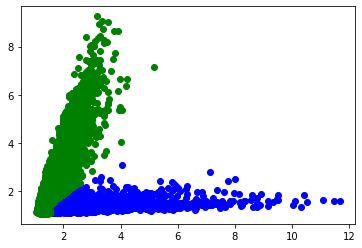

In [117]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(df5)

#predictions from gmm
pred = gmm.predict(df5)
frame = pd.DataFrame(df5)
frame['cluster'] = pred
frame.columns = ['LOG_NDUFA13', 'LOG_VDAC1', 'cluster']

color=['blue','green', 'cyan', 'red']
for k in range(0,4):
    df5 = frame[frame["cluster"]==k]
    plt.scatter(df5["LOG_VDAC1"], df5["LOG_NDUFA13"], c=color[k])
plt.show()

In [101]:
df6 = df[['LOG_NDUFB8', 'LOG_VDAC1']]
print(df6)

      LOG_NDUFB8  LOG_VDAC1
0       1.926028   1.574617
1       2.671580   1.753394
2       2.160935   1.552955
3       2.566386   1.750554
4       1.769816   1.469509
...          ...        ...
8989    1.519806   2.976675
8990    1.191700   5.544963
8991    1.312752   9.497522
8992    2.606018   2.405839
8993    1.206204   4.394516

[8994 rows x 2 columns]


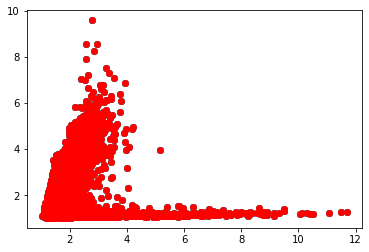

In [118]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(df6)

#predictions from gmm
preds = gmm.predict(df6)
frame = pd.DataFrame(df6)
frame['cluster'] = preds
frame.columns = ['LOG_NDUFB8', 'LOG_VDAC1', 'cluster']

color=['blue','green', 'cyan', 'red']
for k in range(0,4):
    df5 = frame[frame["cluster"]==k]
    plt.scatter(df6["LOG_VDAC1"], df6["LOG_NDUFB8"], c=color[k])
plt.show()